C:\Anaconda3\lib\site-packages\matplotlib\colors.py:1355: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


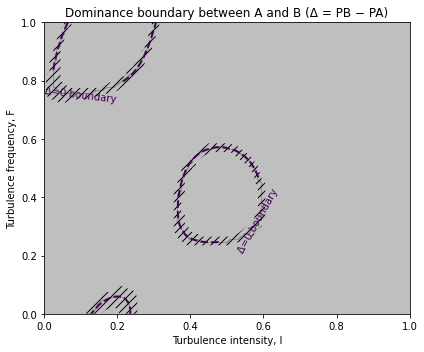

In [1]:
# Demonstration: dominance boundary where Delta = PB - PA = 0
#
# This script:
# 1) Constructs the shared grids I (intensity) and F (frequency)
# 2) Creates two synthetic datasets PA(I,F) and PB(I,F) over the entire grid
# 3) Computes Delta = PB - PA
# 4) Plots a phase-style diagram:
#    - light/medium shading for regions where A or B dominates (sign of Delta)
#    - a dashed contour for the reversal boundary (Delta = 0)
#    - optional hatched band for |Delta| < tolerance, showing numerical ambiguity

import numpy as np
import matplotlib.pyplot as plt

# 1) Grids
I = np.linspace(0, 1, 101)     # intensity
F = np.linspace(0, 1, 101)     # frequency
II, FF = np.meshgrid(I, F, indexing='ij')

# 2) Two synthetic datasets (replace with your model outputs)
#    Choose smooth but distinct surfaces to ensure crossings.
PA = 0.6*II + 0.4*FF + 0.2*np.sin(3*np.pi*II)*np.cos(2*np.pi*FF)
PB = 0.25 + 0.9*II**2 + 0.3*FF + 0.15*np.cos(2*np.pi*II)*np.sin(2*np.pi*FF)

# 3) Difference
Delta = PB - PA

# 4) Plot
fig, ax = plt.subplots(figsize=(6,5))

# Binary shading by sign of Delta (A better vs B better)
# Using two levels keeps it crisp; we do not set any explicit colors.
levels = [-np.inf, 0, np.inf]
cf = ax.contourf(II, FF, np.sign(Delta), levels=levels, alpha=0.25)

# Zero-level contour = reversal boundary
cs = ax.contour(II, FF, Delta, levels=[0.0], linestyles='--', linewidths=2)
ax.clabel(cs, fmt={0.0: "Δ=0 boundary"}, inline=True)

# Optional: show a tolerance band where |Delta| < tol (numerical ambiguity)
tol = 0.02  # adjust based on your simulation noise
ambiguous = np.abs(Delta) < tol
# Draw hatching over ambiguous cells by contouring the boolean mask
ax.contourf(II, FF, ambiguous.astype(int), levels=[0.5, 1.5], hatches=['///'], alpha=0)

ax.set_xlabel("Turbulence intensity, I")
ax.set_ylabel("Turbulence frequency, F")
ax.set_title("Dominance boundary between A and B (Δ = PB − PA)")
plt.tight_layout()
plt.show()
